In [3]:
import os
import shutil
import pandas as pd
from sklearn.utils import shuffle

# Set the paths for the original and new datasets
original_train_dir = '/Users/nisargp/PycharmProjects/CV/Assignment /vinbigdata/train'
original_test_dir = '/Users/nisargp/PycharmProjects/CV/Assignment /vinbigdata/test'
new_train_dir = '/Users/nisargp/PycharmProjects/CV/Assignment /VinBigDatasetSmall/Train'
new_test_dir = '/Users/nisargp/PycharmProjects/CV/Assignment /VinBigDatasetSmall/Test'

# Create new directories for the smaller dataset
os.makedirs(new_train_dir, exist_ok=True)
os.makedirs(new_test_dir, exist_ok=True)

# Function to copy a subset of images to a new directory and filter the CSV accordingly
def create_subset(original_dir, new_dir, original_csv_path, new_csv_path, n=500, column_name='image_id', file_extension='.jpg'):
    # Read the original CSV file
    df = pd.read_csv(original_csv_path)
    
    # Shuffle the dataframe to ensure random selection of images
    df = shuffle(df, random_state=42)
    
    # Select the first n entries
    subset_df = df.head(n)
    
    # Copy the corresponding images to the new directory
    for image_id in subset_df[column_name]:
        filename = f"{image_id}{file_extension}"  # Append the file extension to the image_id
        src_path = os.path.join(original_dir, filename)
        dst_path = os.path.join(new_dir, filename)
        shutil.copy(src_path, dst_path)
    
    # Save the new CSV file with the subset of data
    subset_df.to_csv(new_csv_path, index=False)

# Paths for the new CSV files
new_train_csv = '/Users/nisargp/PycharmProjects/CV/Assignment /VinBigDatasetSmall/train.csv'
new_test_csv = '/Users/nisargp/PycharmProjects/CV/Assignment /VinBigDatasetSmall/test.csv'

# Create the subsets
create_subset(original_train_dir, new_train_dir, '/Users/nisargp/PycharmProjects/CV/Assignment /vinbigdata/train.csv', new_train_csv, column_name='image_id')
create_subset(original_test_dir, new_test_dir, '/Users/nisargp/PycharmProjects/CV/Assignment /vinbigdata/test.csv', new_test_csv, column_name='image_id')


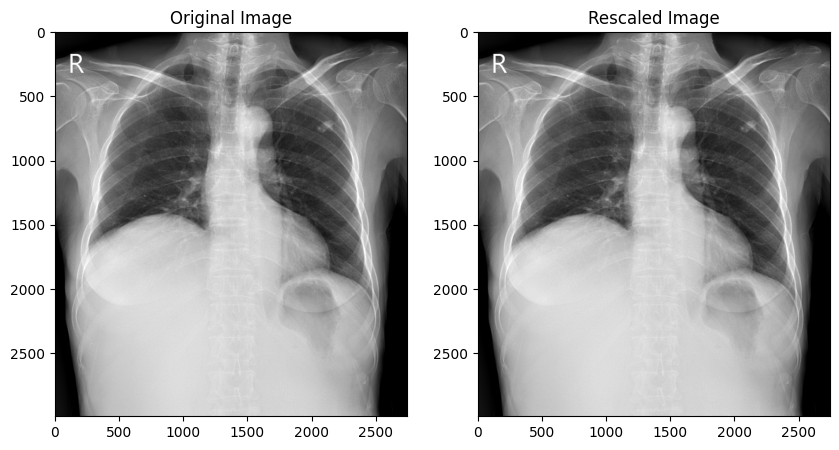

In [4]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

# Path to the smaller dataset directory
dataset_dir = '/Users/nisargp/PycharmProjects/CV/Assignment /VinBigDatasetSmall/Train'

# Function to rescale images
def rescale_images(directory):
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):  # or ".jpeg" or ".png", depending on your file format
            # Read the image
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read in grayscale mode

            # Rescale the image
            img_rescaled = img / 255.0  # Rescale pixel values from 0-255 to 0-1

            # Display the original and rescaled images for comparison
            plt.figure(figsize=(10, 5))
            plt.subplot(1, 2, 1)
            plt.imshow(img, cmap='gray')
            plt.title('Original Image')
            plt.subplot(1, 2, 2)
            plt.imshow(img_rescaled, cmap='gray')
            plt.title('Rescaled Image')
            plt.show()

            # Break after first image for demo
            break

# Call the function
rescale_images(dataset_dir)


In [5]:
import cv2
import os

# Path to the original and new directories
original_dir = '/Users/nisargp/PycharmProjects/CV/Assignment /VinBigDatasetSmall/Train'
rescaled_dir = '/Users/nisargp/PycharmProjects/CV/Assignment /VinBigDatasetSmall/Train_Rescaled'

# Create the new directory for rescaled images if it doesn't exist
os.makedirs(rescaled_dir, exist_ok=True)

# Function to rescale and save images
def rescale_and_save_images(original_directory, new_directory):
    for filename in os.listdir(original_directory):
        if filename.endswith(".jpg"):  # Adjust if your images have a different format
            # Read the image
            img_path = os.path.join(original_directory, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read in grayscale

            # Rescale the image
            img_rescaled = img / 255.0  # Convert pixel values from 0-255 to 0-1

            # Save the rescaled image
            save_path = os.path.join(new_directory, filename)
            cv2.imwrite(save_path, img_rescaled * 255)  # Convert back to 0-255 scale for saving

            # Optionally, print out a message to know the script is running
            print(f"Rescaled and saved {filename}")

# Call the function to rescale and save all images
rescale_and_save_images(original_dir, rescaled_dir)


Rescaled and saved 411720e11033999fe479d1c1a66819e9.jpg
Rescaled and saved b2d24152edd17675c23d5cc4c9e92a02.jpg
Rescaled and saved 166c7f4f9050fea91eced49d4ff5933c.jpg
Rescaled and saved 66cbffba7ea1246d296e6773832a5ed5.jpg
Rescaled and saved 5e05a7d4ef96fe954dc2bd2b42256cc9.jpg
Rescaled and saved 27128ae2af0e160293897cd55c02993b.jpg
Rescaled and saved 51a8d7259a0a6deac20b7c4979a7e847.jpg
Rescaled and saved 6452a9e9489dadc789cb44af7d3dadab.jpg
Rescaled and saved 3fb83af943cdcbd3d255a51b0d86f827.jpg
Rescaled and saved 9ca2725b69db57ebc2df26a7da70affb.jpg
Rescaled and saved f26d7ce59f580ab775886542802b6d21.jpg
Rescaled and saved 3dfb420f4634c36fde566f04e6d69651.jpg
Rescaled and saved bf742708d94bd9f8620db2f6f4b596f5.jpg
Rescaled and saved 633a915d9f92edf4edc1c4a85548201f.jpg
Rescaled and saved 6c63a1225abbaf4be97d520df64d9125.jpg
Rescaled and saved a1134e92282815efb505a93105083393.jpg
Rescaled and saved 52fb2ec0830cc3163480f0ba9aa1fd66.jpg
Rescaled and saved def6b60a136b880ef5733241781a8

In [6]:
import cv2
import os

# Path to the rescaled images directory and the new resized directory
rescaled_dir = '/Users/nisargp/PycharmProjects/CV/Assignment /VinBigDatasetSmall/Train_Rescaled'
resized_dir = '/Users/nisargp/PycharmProjects/CV/Assignment /VinBigDatasetSmall/Train_Resized'

# New dimensions
width, height = 256, 256

# Create the new directory for resized images if it doesn't exist
os.makedirs(resized_dir, exist_ok=True)

# Function to resize and save images
def resize_and_save_images(original_directory, new_directory, new_width, new_height):
    for filename in os.listdir(original_directory):
        if filename.endswith(".jpg"):  # Adjust if your images have a different format
            # Read the image
            img_path = os.path.join(original_directory, filename)
            img = cv2.imread(img_path)  # Read in grayscale if needed

            # Resize the image
            img_resized = cv2.resize(img, (new_width, new_height))

            # Save the resized image
            save_path = os.path.join(new_directory, filename)
            cv2.imwrite(save_path, img_resized)

            # Optionally, print out a message to know the script is running
            print(f"Resized and saved {filename}")

# Call the function to resize and save all images
resize_and_save_images(rescaled_dir, resized_dir, width, height)


Resized and saved 411720e11033999fe479d1c1a66819e9.jpg
Resized and saved b2d24152edd17675c23d5cc4c9e92a02.jpg
Resized and saved 166c7f4f9050fea91eced49d4ff5933c.jpg
Resized and saved 66cbffba7ea1246d296e6773832a5ed5.jpg
Resized and saved 5e05a7d4ef96fe954dc2bd2b42256cc9.jpg
Resized and saved 27128ae2af0e160293897cd55c02993b.jpg
Resized and saved 51a8d7259a0a6deac20b7c4979a7e847.jpg
Resized and saved 6452a9e9489dadc789cb44af7d3dadab.jpg
Resized and saved 3fb83af943cdcbd3d255a51b0d86f827.jpg
Resized and saved 9ca2725b69db57ebc2df26a7da70affb.jpg
Resized and saved f26d7ce59f580ab775886542802b6d21.jpg
Resized and saved 3dfb420f4634c36fde566f04e6d69651.jpg
Resized and saved bf742708d94bd9f8620db2f6f4b596f5.jpg
Resized and saved 633a915d9f92edf4edc1c4a85548201f.jpg
Resized and saved 6c63a1225abbaf4be97d520df64d9125.jpg
Resized and saved a1134e92282815efb505a93105083393.jpg
Resized and saved 52fb2ec0830cc3163480f0ba9aa1fd66.jpg
Resized and saved def6b60a136b880ef5733241781a803d.jpg
Resized an

In [7]:
import cv2
import os
import numpy as np

# Path to the resized images directory and the new directory for histogram equalized images
resized_dir = '/Users/nisargp/PycharmProjects/CV/Assignment /VinBigDatasetSmall/Train_Resized'
hist_eq_dir = '/Users/nisargp/PycharmProjects/CV/Assignment /VinBigDatasetSmall/Train_HistEq'

# Create the new directory for histogram equalized images if it doesn't exist
os.makedirs(hist_eq_dir, exist_ok=True)

# Function to apply histogram equalization and save images
def histogram_equalization_and_save_images(original_directory, new_directory):
    for filename in os.listdir(original_directory):
        if filename.endswith(".jpg"):  # Adjust if your images have a different format
            # Read the image
            img_path = os.path.join(original_directory, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Assuming images are grayscale

            # Apply histogram equalization
            img_hist_eq = cv2.equalizeHist(img)

            # Save the histogram equalized image
            save_path = os.path.join(new_directory, filename)
            cv2.imwrite(save_path, img_hist_eq)

            # Optionally, print out a message to know the script is running
            print(f"Histogram equalized and saved {filename}")

# Call the function to apply histogram equalization and save all images
histogram_equalization_and_save_images(resized_dir, hist_eq_dir)


Histogram equalized and saved 411720e11033999fe479d1c1a66819e9.jpg
Histogram equalized and saved b2d24152edd17675c23d5cc4c9e92a02.jpg
Histogram equalized and saved 166c7f4f9050fea91eced49d4ff5933c.jpg
Histogram equalized and saved 66cbffba7ea1246d296e6773832a5ed5.jpg
Histogram equalized and saved 5e05a7d4ef96fe954dc2bd2b42256cc9.jpg
Histogram equalized and saved 27128ae2af0e160293897cd55c02993b.jpg
Histogram equalized and saved 51a8d7259a0a6deac20b7c4979a7e847.jpg
Histogram equalized and saved 6452a9e9489dadc789cb44af7d3dadab.jpg
Histogram equalized and saved 3fb83af943cdcbd3d255a51b0d86f827.jpg
Histogram equalized and saved 9ca2725b69db57ebc2df26a7da70affb.jpg
Histogram equalized and saved f26d7ce59f580ab775886542802b6d21.jpg
Histogram equalized and saved 3dfb420f4634c36fde566f04e6d69651.jpg
Histogram equalized and saved bf742708d94bd9f8620db2f6f4b596f5.jpg
Histogram equalized and saved 633a915d9f92edf4edc1c4a85548201f.jpg
Histogram equalized and saved 6c63a1225abbaf4be97d520df64d9125

In [13]:
import cv2
import os

# Path to the histogram equalized images directory and the new directory for denoised images
hist_eq_dir = '/Users/nisargp/PycharmProjects/CV/Assignment /VinBigDatasetSmall/Train_HistEq'
denoised_dir = '/Users/nisargp/PycharmProjects/CV/Assignment /VinBigDatasetSmall/Train_Denoised'

# Create the new directory for denoised images if it doesn't exist
os.makedirs(denoised_dir, exist_ok=True)

# Function to apply non-local means denoising and save images
def denoise_and_save_images(original_directory, new_directory, h=10, templateWindowSize=7, searchWindowSize=21):
    for filename in os.listdir(original_directory):
        if filename.endswith(".jpg"):  # Adjust if your images have a different format
            # Read the image
            img_path = os.path.join(original_directory, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Assuming images are grayscale

            # Apply non-local means denoising
            img_denoised = cv2.fastNlMeansDenoising(img, None, h, templateWindowSize, searchWindowSize)

            # Save the denoised image
            save_path = os.path.join(new_directory, filename)
            cv2.imwrite(save_path, img_denoised)

            # Optionally, print out a message to know the script is running
            print(f"Denoised and saved {filename}")

# Call the function to apply denoising and save all images
denoise_and_save_images(hist_eq_dir, denoised_dir)


Denoised and saved 411720e11033999fe479d1c1a66819e9.jpg
Denoised and saved b2d24152edd17675c23d5cc4c9e92a02.jpg
Denoised and saved 166c7f4f9050fea91eced49d4ff5933c.jpg
Denoised and saved 66cbffba7ea1246d296e6773832a5ed5.jpg
Denoised and saved 5e05a7d4ef96fe954dc2bd2b42256cc9.jpg
Denoised and saved 27128ae2af0e160293897cd55c02993b.jpg
Denoised and saved 51a8d7259a0a6deac20b7c4979a7e847.jpg
Denoised and saved 6452a9e9489dadc789cb44af7d3dadab.jpg
Denoised and saved 3fb83af943cdcbd3d255a51b0d86f827.jpg
Denoised and saved 9ca2725b69db57ebc2df26a7da70affb.jpg
Denoised and saved f26d7ce59f580ab775886542802b6d21.jpg
Denoised and saved 3dfb420f4634c36fde566f04e6d69651.jpg
Denoised and saved bf742708d94bd9f8620db2f6f4b596f5.jpg
Denoised and saved 633a915d9f92edf4edc1c4a85548201f.jpg
Denoised and saved 6c63a1225abbaf4be97d520df64d9125.jpg
Denoised and saved a1134e92282815efb505a93105083393.jpg
Denoised and saved 52fb2ec0830cc3163480f0ba9aa1fd66.jpg
Denoised and saved def6b60a136b880ef5733241781a8

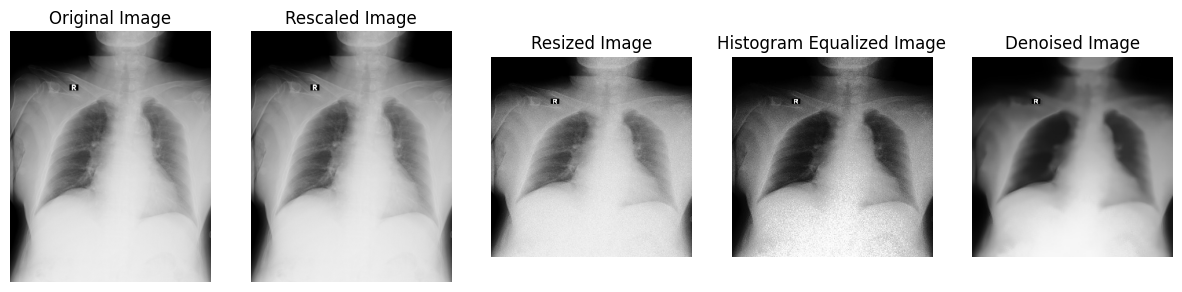

In [14]:
import cv2
from matplotlib import pyplot as plt

# File paths for the original and preprocessed images
original_img_path = '/Users/nisargp/PycharmProjects/CV/Assignment /VinBigDatasetSmall/Train/1cec183870c936178be89a81da2cc7fc.jpg'  
rescaled_img_path = '/Users/nisargp/PycharmProjects/CV/Assignment /VinBigDatasetSmall/Train_Rescaled/1cec183870c936178be89a81da2cc7fc.jpg' 
resized_img_path = '/Users/nisargp/PycharmProjects/CV/Assignment /VinBigDatasetSmall/Train_Resized/1cec183870c936178be89a81da2cc7fc.jpg'    
hist_eq_img_path = '/Users/nisargp/PycharmProjects/CV/Assignment /VinBigDatasetSmall/Train_HistEq/1cec183870c936178be89a81da2cc7fc.jpg'    
denoised_img_path = '/Users/nisargp/PycharmProjects/CV/Assignment /VinBigDatasetSmall/Train_Denoised/1cec183870c936178be89a81da2cc7fc.jpg'  

# Function to read and convert image for plotting
def read_and_convert(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Assuming images are in grayscale
    return cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)  # Convert grayscale to RGB for plotting

# Read all images
original_img = read_and_convert(original_img_path)
rescaled_img = read_and_convert(rescaled_img_path)
resized_img = read_and_convert(resized_img_path)
hist_eq_img = read_and_convert(hist_eq_img_path)
denoised_img = read_and_convert(denoised_img_path)

# Plotting the images side by side for comparison
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed

# Original image
plt.subplot(1, 5, 1)
plt.imshow(original_img)
plt.title('Original Image')
plt.axis('off')

# Rescaled image
plt.subplot(1, 5, 2)
plt.imshow(rescaled_img)
plt.title('Rescaled Image')
plt.axis('off')

# Resized image
plt.subplot(1, 5, 3)
plt.imshow(resized_img)
plt.title('Resized Image')
plt.axis('off')

# Histogram Equalized image
plt.subplot(1, 5, 4)
plt.imshow(hist_eq_img)
plt.title('Histogram Equalized Image')
plt.axis('off')

# Denoised image
plt.subplot(1, 5, 5)
plt.imshow(denoised_img)
plt.title('Denoised Image')
plt.axis('off')

# Show the plot
plt.show()
